Brad Kelly, Cameron Shollenberger, Onur Gencer Ates, Jacob Beyloune, Thomas Day

# Exploritory Data Analysis

Bring in the data and look for '?' to identify missing data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
df = pd.read_csv('data.csv', names = ["#A","B","#C","D","#E","F","G","H","I","J","#K","#L","#M","N","O"], header = None)

In [46]:
df['#A'].unique()

array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87], dtype=int64)

In [47]:
df['B'].unique()

array(['A0', 'A1', 'A2', 'A3', 'A4', '?', 'A6', 'A7', 'A8'], dtype=object)

In [59]:
df = df[~df.eq("?").any(1)]

In [50]:
df.head()

,#A,B,#C,D,#E,F,G,H,I,J,#K,#L,#M,N,O
0,39,A0,77516,B0,13,C0,D0,E0,F0,G0,2174,0,40,H0,SMALL
1,50,A1,83311,B0,13,C1,D1,E1,F0,G0,0,0,13,H0,SMALL
2,38,A2,215646,B1,9,C2,D2,E0,F0,G0,0,0,40,H0,SMALL
3,53,A2,234721,B2,7,C1,D2,E1,F1,G0,0,0,40,H0,SMALL
4,28,A2,338409,B0,13,C1,D3,E2,F1,G1,0,0,40,H1,SMALL


In [10]:
df.describe()

,#A,#C,#E,#K,#L,#M
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Based on #K and #L having no data values that aren't in the 75th percentile along wth #C having a very large standard deviation it looks as though the data may need to be normalized when a model is created. The assumption will be checked with a dist plot fro those categories along with for all other numeric categories

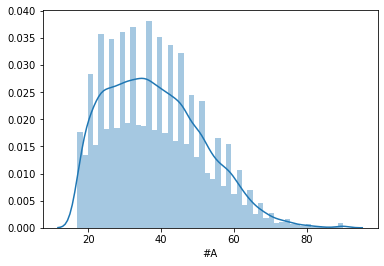

In [11]:
sns.distplot(df['#A'])

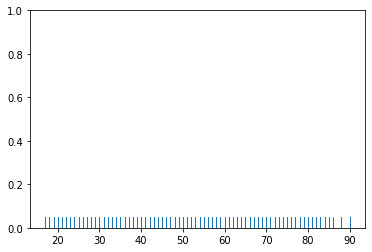

In [89]:
sns.rugplot(df['#A'])

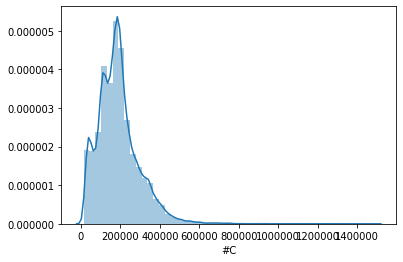

In [13]:
sns.distplot(df['#C'])

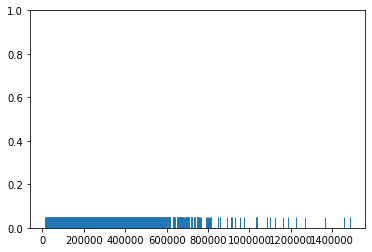

In [87]:
sns.rugplot(df['#C'])

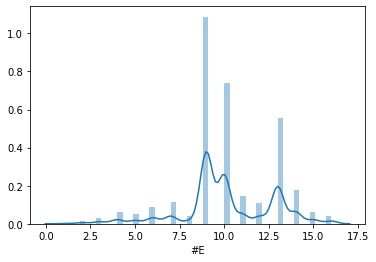

In [14]:
sns.distplot(df['#E'])

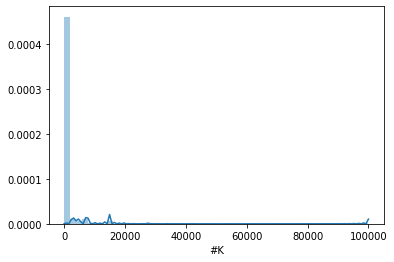

In [15]:
sns.distplot(df['#K'])

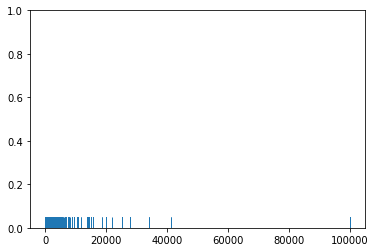

In [90]:
sns.rugplot(df['#K'])

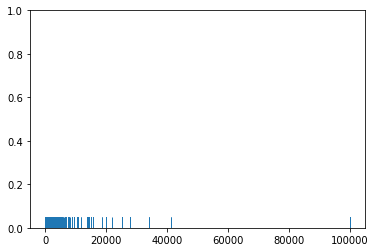

In [88]:
sns.rugplot(df['#K'])

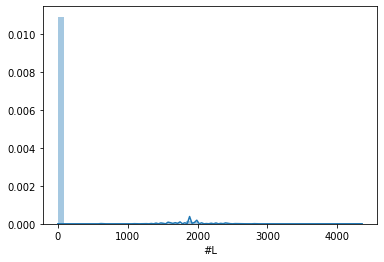

In [16]:
sns.distplot(df['#L'])

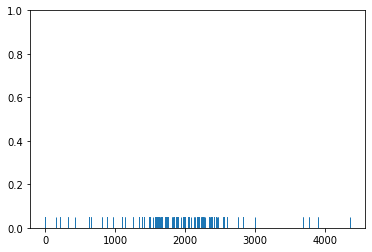

In [91]:
sns.rugplot(df['#L'])

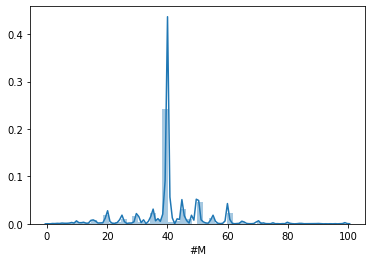

In [17]:
sns.distplot(df['#M'])

The various distplots confirm the assumption with both #K and #L having very large ranges of values. Specifically #K has the majority of its points from 0-20,000 with a few outliers extending out to 100,000 and with the variable #L, the majority of points that are not 0 have a central tendancy centered around 2,000. With the variable #C most of the data is in a 0-800,000 range with some extending all the way out to 1,400,000

In [54]:
df['O'].unique()

array(['SMALL', 'LARGE'], dtype=object)

In [55]:
df['O'].value_counts()

SMALL    22654
LARGE     7508
Name: O, dtype: int64

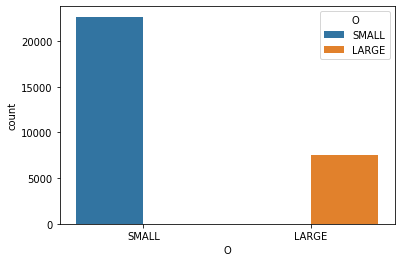

In [77]:
sns.countplot('O', hue = 'O', data = df)

In [78]:
df['O'].value_counts()

SMALL    22654
LARGE     7508
Name: O, dtype: int64

In [21]:
df['#A'].unique()

array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 34, 25, 43, 40,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 47, 46,
       36, 79, 27, 18, 33, 76, 55, 61, 70, 64, 71, 66, 51, 58, 26, 17, 60,
       90, 75, 65, 77, 62, 63, 67, 74, 72, 69, 68, 73, 81, 78, 88, 80, 84,
       83, 85, 82, 86], dtype=int64)

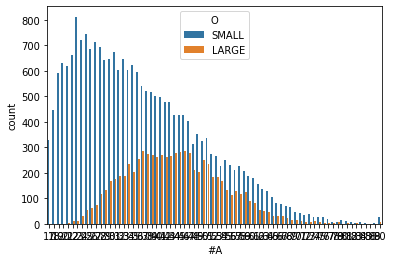

In [22]:
sns.countplot('#A', hue = 'O', data = df)

In [52]:
df['B'].unique()

array(['A0', 'A1', 'A2', 'A3', 'A4', 'A6', 'A7'], dtype=object)

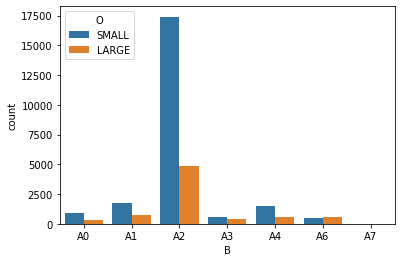

In [25]:
sns.countplot('B', hue = 'O', data = df)

In [80]:
sum(df['#C'].value_counts())

30162

In [81]:
df['#C'].value_counts()

203488    13
113364    12
164190    12
123011    12
148995    12
          ..
34393      1
288341     1
239415     1
118352     1
229376     1
Name: #C, Length: 20263, dtype: int64

In [ ]:
sns.countplot('#C', hue = 'O', data = df)

In [28]:
df['D'].unique()

array(['B0', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B8', 'B9', 'B7', 'B10',
       'B11', 'B12', 'B14', 'B15', 'B13'], dtype=object)

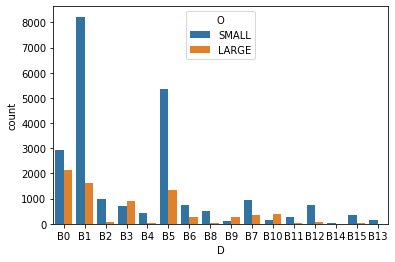

In [29]:
sns.countplot('D', hue = 'O', data = df)

In [38]:
df['#E'].unique()

array([13,  9,  7, 14,  5, 10, 12,  4, 16, 11, 15,  3,  6,  1,  8,  2],
      dtype=int64)

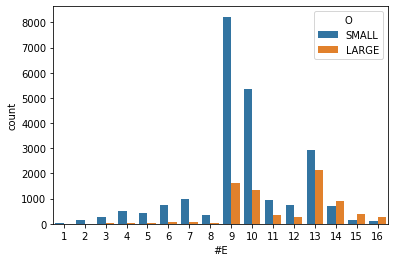

In [39]:
sns.countplot('#E', hue = 'O', data = df)

In [27]:
df['F'].unique()

array(['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6'], dtype=object)

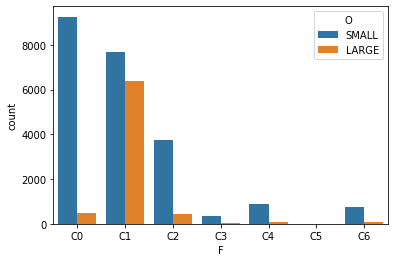

In [28]:
sns.countplot('F', hue = 'O', data = df)

In [37]:
df['G'].unique()

array(['D0', 'D1', 'D2', 'D3', 'D4', 'D5', 'D7', 'D8', 'D9', 'D10', 'D6',
       'D12', 'D13', 'D14'], dtype=object)

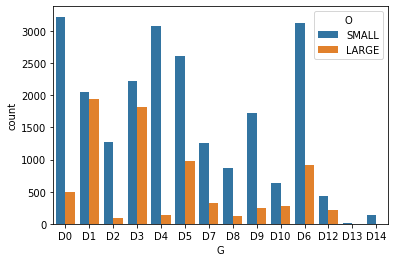

In [40]:
sns.countplot('G', hue = 'O', data = df)

In [42]:
df['H'].unique()

array(['E0', 'E1', 'E2', 'E3', 'E4', 'E5'], dtype=object)

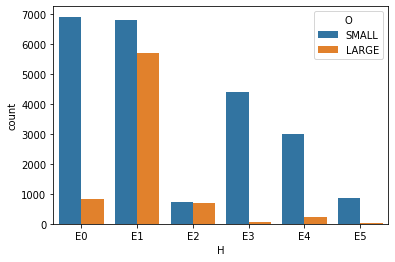

In [44]:
sns.countplot('H', hue = 'O', data = df)

In [45]:
df['I'].unique()

array(['F0', 'F1', 'F2', 'F3', 'F4'], dtype=object)

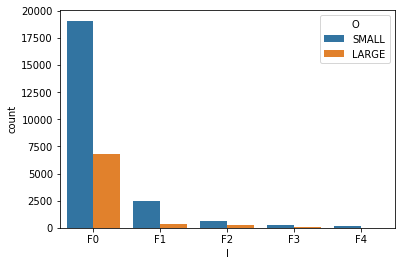

In [46]:
sns.countplot('I', hue = 'O', data = df)

In [47]:
df['J'].unique()

array(['G0', 'G1'], dtype=object)

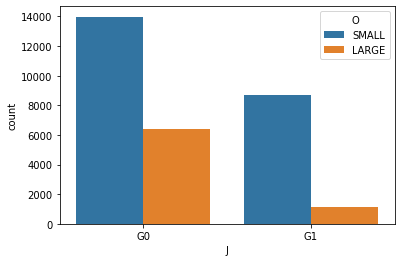

In [69]:
sns.countplot('J', hue = 'O', data = df)

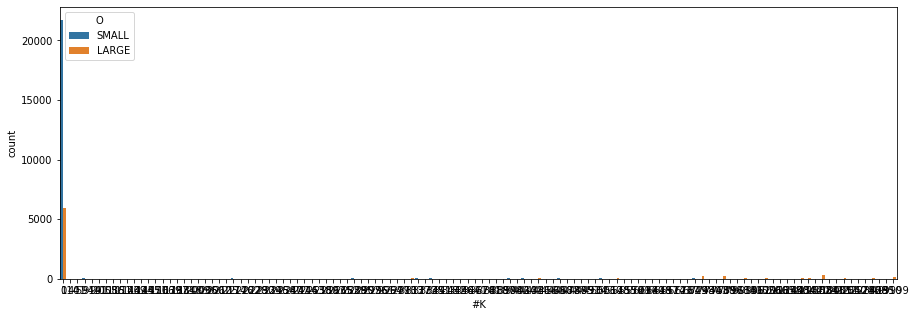

In [67]:
plt.figure(figsize=(15,5))
sns.countplot('#K', hue = 'O', data = df)

In [51]:
df['#K'].value_counts()

0        27624
15024      337
7688       270
7298       240
99999      148
         ...  
401          1
22040        1
4931         1
1455         1
1639         1
Name: #K, Length: 118, dtype: int64

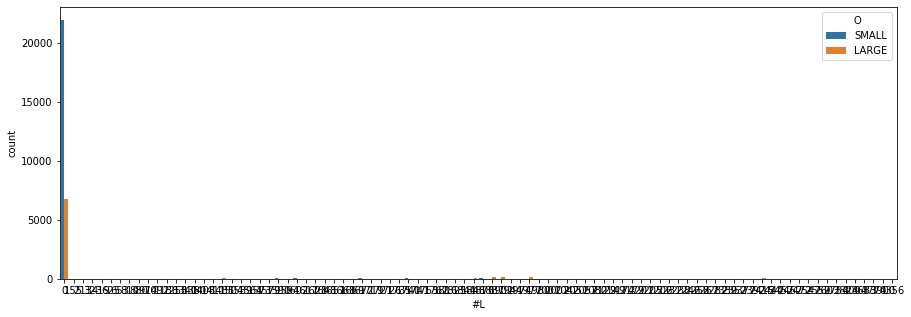

In [66]:
plt.figure(figsize=(15,5))
sns.countplot('#L', hue = 'O', data = df)

In [53]:
df['#L'].value_counts()

0       28735
1902      194
1977      162
1887      155
1848       50
        ...  
419         1
1411        1
1539        1
2472        1
2467        1
Name: #L, Length: 90, dtype: int64

In [55]:
df['N'].unique()

array(['H0', 'H1', 'H2', 'H3', 'H5', 'H7', 'H8', 'H9', 'H10', 'H11',
       'H12', 'H13', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21',
       'H22', 'H23', 'H24', 'H25', 'H26', 'H27', 'H14', 'H28', 'H6',
       'H29', 'H30', 'H31', 'H32', 'H33', 'H34', 'H35', 'H36', 'H37',
       'H38', 'H39', 'H40', 'H41'], dtype=object)

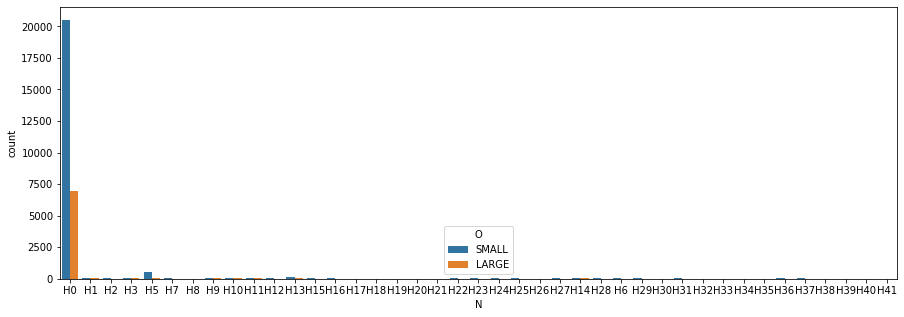

In [65]:
plt.figure(figsize=(15,5))
sns.countplot('N', hue = 'O', data = df)

In [68]:
ddfnh = df[df['N'] == 'H0']
sns.countplot('N', hue = 'O', data = ddfnh)

H0     27504
H5       610
H13      188
H11      128
H7       109
H10      107
H25      100
H3       100
H1        92
H9        86
H2        80
H6        71
H14       68
H28       68
H24       67
H37       64
H27       63
H29       59
H15       56
H16       56
H22       42
H12       42
H21       42
H23       34
H36       33
H31       30
H35       29
H26       27
H19       27
H39       24
H38       19
H17       18
H34       18
H18       17
H20       17
H30       16
H32       14
H40       13
H8        12
H33       11
H41        1
Name: N, dtype: int64

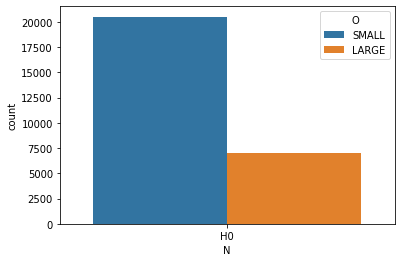

In [62]:
ddfnh = df[df['N'] == 'H0']
sns.countplot('N', hue = 'O', data = ddfnh)

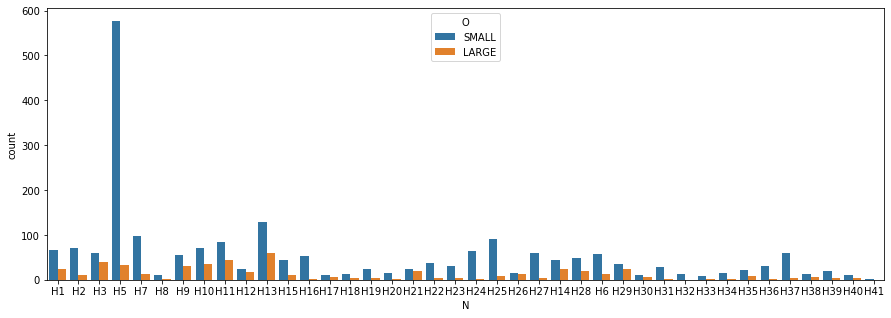

In [64]:
plt.figure(figsize=(15,5))
ddfnh1 = df[df['N'] != 'H0']
sns.countplot('N', hue = 'O', data = ddfnh1)

Nearly all the data is in agreement with the fact that the target class has significantly more Small values that Large values except for a few exceptions. Variable D will randomly have some categories where Large is greater by count to Small. While category #E is in agreement with the overall trend untill values are greater than or equal to 14 where Large is greater by count than Small

# Check independence of numeric variables

In [83]:
df_numeric = df[['#A','#C','#E','#K','#L','#M','O']]

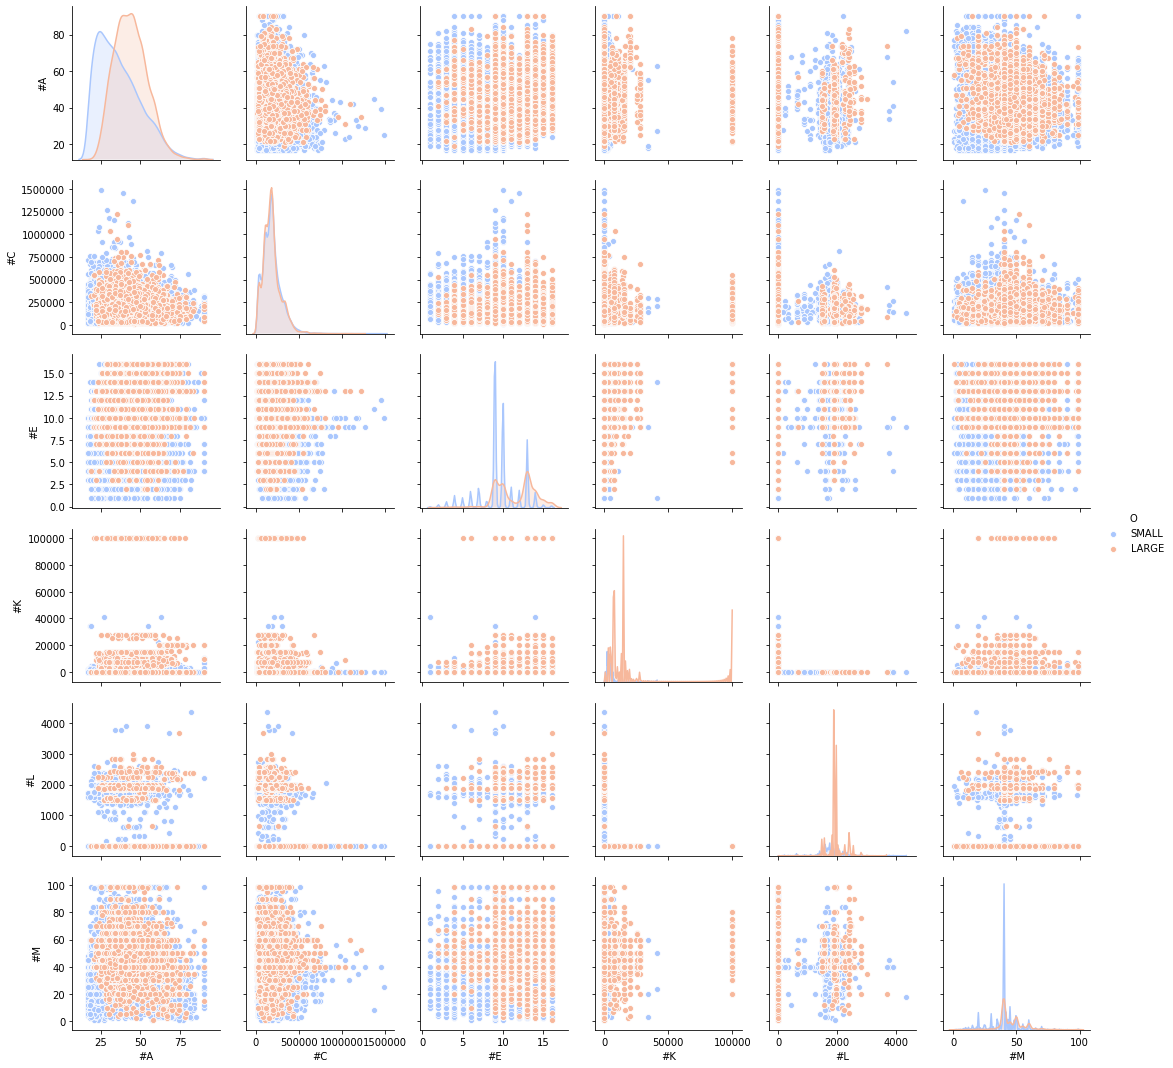

In [86]:
sns.pairplot(df_numeric,hue='O',palette='coolwarm')

The pair plot above shows no evidence for dependence between the numeric vairables. The numeric data is independent